In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_boston
from sklearn.model_selection import train_test_split

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

In [26]:
diabetes_ds = load_diabetes()
X = diabetes_ds.data
Y = diabetes_ds.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

In [28]:
generator = GeneticFeatureGenerator(
    X_train, 
    Y_train, 
    [add, sub, mul, div], 
    operation_names = ["+", "-", "*", "/"], 
    popsize = 100, 
    maxiter = 50, 
    clone_prob = 0.1, 
    mutation_rate = 0.1
)

In [29]:
res = generator.optimize()

Generation initialized
Generation:  0
Best fitness:  0.444412552025862
Worst fitness:  0.0
Mean fitness:  0.17201811653304921
Median fitness:  0.17953401252766893
Std fitness:  0.11195679442597722

Generation:  1
Best fitness:  0.444871825539081
Worst fitness:  0.0
Mean fitness:  0.21030042426285392
Median fitness:  0.19315144596601086
Std fitness:  0.11219773416609957

Generation:  2
Best fitness:  0.45119044853959855
Worst fitness:  0.0
Mean fitness:  0.25813752136354884
Median fitness:  0.22717437287882938
Std fitness:  0.12237082378810439

Generation:  3
Best fitness:  0.45119044853959855
Worst fitness:  0.0
Mean fitness:  0.3034445504532931
Median fitness:  0.32052074701260347
Std fitness:  0.10908558974744118

Generation:  4
Best fitness:  0.46422145455480696
Worst fitness:  0.0
Mean fitness:  0.34978057494363735
Median fitness:  0.37834229170000727
Std fitness:  0.10388488291949559

Generation:  5
Best fitness:  0.4870823054050141
Worst fitness:  0.0
Mean fitness:  0.37506034727

In [30]:
print(res)

+
	/
		*
			DataNode 5
			ScalarNode 0.7411500389683614
		DataNode 6
	-
		DataNode 8
		*
			+
				*
					DataNode 6
					-
						+
							DataNode 8
							DataNode 2
						DataNode 6
				+
					ScalarNode 0.8975746815470089
					-
						ScalarNode 0.6131402739813241
						-
							DataNode 8
							ScalarNode 0.3987687997769226
			+
				+
					+
						*
							+
								DataNode 2
								*
									ScalarNode 0.3172256780957661
									DataNode 8
							*
								/
									DataNode 7
									DataNode 7
								/
									ScalarNode 0.4144903066612441
									ScalarNode 0.0075016606360971405
						DataNode 6
					ScalarNode 0.6132557901541883
				+
					-
						-
							-
								+
									/
										ScalarNode 0.4144903066612441
										ScalarNode 0.0075016606360971405
									-
										+
											+
												-
													ScalarNode 0.6225683481616479
													+
														DataNode 5
														ScalarNode 0.1569761453471693
												-
													DataNo

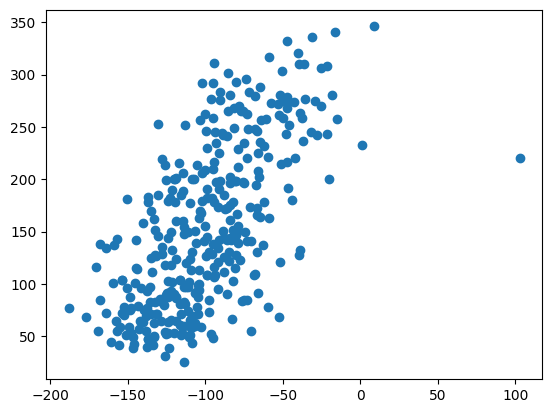

In [31]:
new_col = res(X_train)
new_col_test = res(X_test)
plt.scatter(new_col, Y_train)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
print("RF score: ", rf.score(X_test, Y_test))

rf.fit(np.hstack((X_train, new_col.reshape(-1, 1))), Y_train)
print("RF score with new feature: ", rf.score(np.hstack((X_test, new_col_test.reshape(-1, 1))), Y_test))


RF score:  0.4351410202908689
RF score with new feature:  0.48459346771460954
